# Imports
---

In [1]:
!pip install imblearn==0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 KB 27.9 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
                                                                                                                                                                                                                                                                                                                            import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()

from imblearn.under_sampling import RandomUnderSampler

# Cargar Data
___

In [3]:
#index col para que sepa que esa corresponde a los indices
df_data = pd.read_csv('./dataset_clean.csv', index_col=[0])

# Split target y patrón
___

- Split

In [4]:
# Separo datos entre target vs otrasFeatures
x = df_data.drop('Lowest distortion', axis=1)

y = df_data['Lowest distortion']

- Validación

In [5]:
print(x.shape)
print(y.shape)

(3967, 12)
(3967,)


# Procesamiento de datos
___

> Comprobar si Dataset es balanceado

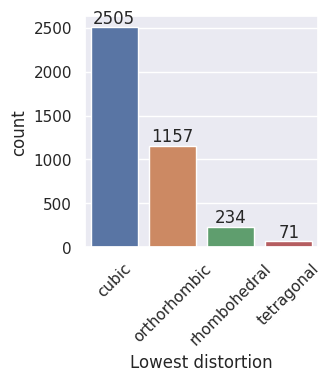

In [6]:
plt.figure(figsize=(3,3))

unbalancedSplot = sns.countplot( x = df_data['Lowest distortion'] )

plt.bar_label(unbalancedSplot.containers[0])
plt.xticks(rotation=45)
plt.show()

> Balancear (undersampling o oversampling)

- Creo instancia del undersampler

In [7]:
undersample = RandomUnderSampler(random_state=42)

- Under sampling

In [8]:
x_over, y_over = undersample.fit_resample(x,y)

- Validación

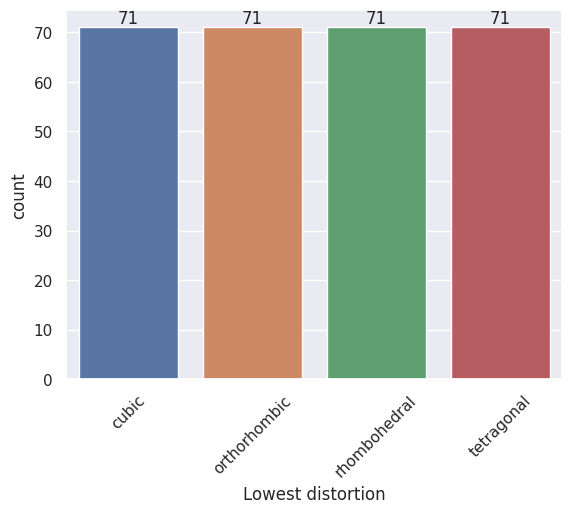

In [9]:
balancedSplot = sns.countplot(x = y_over)
plt.bar_label(balancedSplot.containers[0])
plt.xticks(rotation=45)
plt.show()

> Target categórico a numérico

- Saco lista con labels categóricos (np.unique)

In [10]:
categoricalTarget = list(np.unique(y_over))
categoricalTarget

['cubic', 'orthorhombic', 'rhombohedral', 'tetragonal']

- Creo lista con labels numéricos

In [11]:
numericalTarget = list(range(0,4))
numericalTarget

[0, 1, 2, 3]

- Remplazo labels categóricos con numéricos

In [12]:
y_full = y_over.replace(categoricalTarget, numericalTarget, inplace = False)
list(np.unique(y_full))

[0, 1, 2, 3]

> Preparación de la data para manejo como dummies

- Verifico cuáles son los features categóricos restantes

In [13]:
x_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   A                           284 non-null    object 
 1   B                           284 non-null    object 
 2   Valence A                   284 non-null    object 
 3   Valence B                   284 non-null    object 
 4   Radius A [ang]              284 non-null    float64
 5   Radius B [ang]              284 non-null    float64
 6   Formation energy [eV/atom]  284 non-null    float64
 7   Stability [eV/atom]         284 non-null    float64
 8   Magnetic moment [mu_B]      284 non-null    float64
 9   Volume per atom [A^3/atom]  284 non-null    float64
 10  Band gap [eV]               284 non-null    float64
 11  Vacancy energy [eV/O atom]  284 non-null    float64
dtypes: float64(8), object(4)
memory usage: 26.8+ KB


- Extraigo  A y B, ya que de ellos no voy a sacar dummies

In [14]:
x_to_dummify = x_over.drop(['A', 'B'], axis=1)

A = x_over['A']
B = x_over['B']

- Valido

In [15]:
x_to_dummify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284 entries, 0 to 283
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Valence A                   284 non-null    object 
 1   Valence B                   284 non-null    object 
 2   Radius A [ang]              284 non-null    float64
 3   Radius B [ang]              284 non-null    float64
 4   Formation energy [eV/atom]  284 non-null    float64
 5   Stability [eV/atom]         284 non-null    float64
 6   Magnetic moment [mu_B]      284 non-null    float64
 7   Volume per atom [A^3/atom]  284 non-null    float64
 8   Band gap [eV]               284 non-null    float64
 9   Vacancy energy [eV/O atom]  284 non-null    float64
dtypes: float64(8), object(2)
memory usage: 22.3+ KB


- Listo las posibles valencias

In [16]:
np.unique(x_to_dummify['Valence A'])

array(['1', '2', '3', '4', '5', 'element not in BV', 'not balanced'],
      dtype=object)

- Convierto en null aquellos elementos no definidos en las dos features de la valencia

In [17]:
to_Nullify = ['element not in BV','not balanced']
for index, row in x_to_dummify.iterrows():
    
    if (row['Valence A'] in to_Nullify):
        x_to_dummify.at[index,'Valence A'] = '-'
    else:
        pass

    if (row['Valence B'] in to_Nullify):
        x_to_dummify.at[index,'Valence B'] = '-'
    else:
        pass

- Valido

In [18]:
np.unique(x_to_dummify['Valence A'])

array(['-', '1', '2', '3', '4', '5'], dtype=object)

> Manejo de Features categóricos (valencias) con dummies (One-hot encoding)

- Convierto features categóricas a dummies/indicadores

In [19]:
x_dummies = pd.get_dummies(x_to_dummify)

- Compruebo los dummies

In [20]:
x_dummies.columns

Index(['Radius A [ang]', 'Radius B [ang]', 'Formation energy [eV/atom]',
       'Stability [eV/atom]', 'Magnetic moment [mu_B]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Valence A_-', 'Valence A_1',
       'Valence A_2', 'Valence A_3', 'Valence A_4', 'Valence A_5',
       'Valence B_-', 'Valence B_1', 'Valence B_2', 'Valence B_3',
       'Valence B_4', 'Valence B_5'],
      dtype='object')

- Elimino valencias desconocidas y compruebo

In [21]:
x_dummies.drop(['Valence A_-', 'Valence B_-'], axis =1, inplace = True)
x_dummies.columns

Index(['Radius A [ang]', 'Radius B [ang]', 'Formation energy [eV/atom]',
       'Stability [eV/atom]', 'Magnetic moment [mu_B]',
       'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Valence A_1', 'Valence A_2',
       'Valence A_3', 'Valence A_4', 'Valence A_5', 'Valence B_1',
       'Valence B_2', 'Valence B_3', 'Valence B_4', 'Valence B_5'],
      dtype='object')

- Inserto nuevamente A y B en los features

In [22]:
x_full = pd.concat([A,B, x_dummies], axis = 1)

- Valido que las targets estén completas

In [23]:
x_full.columns

Index(['A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Valence A_1', 'Valence A_2',
       'Valence A_3', 'Valence A_4', 'Valence A_5', 'Valence B_1',
       'Valence B_2', 'Valence B_3', 'Valence B_4', 'Valence B_5'],
      dtype='object')

> Features categóricos a numéricos

- Valido clases y saco labels categóricos, del target, A y B

In [24]:
a_cats = list(np.unique(A))
len(a_cats)

70

In [25]:
b_cats = list(np.unique(B))
len(b_cats)

69

- Creo lista con labels numéricos

In [26]:
numerical = list(range(1,71))

- Remplazo labels categóricos con numéricos

In [27]:
x_full['A'].replace(a_cats, numerical[0:70], inplace = True)
np.unique(x_full['A'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70])

In [28]:
x_full['B'].replace(b_cats, numerical[0:69], inplace = True)
np.unique(x_full['B'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69])

- Validación final

In [29]:
x_full

,A,B,Radius A [ang],Radius B [ang],Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],Vacancy energy [eV/O atom],Valence A_1,Valence A_2,Valence A_3,Valence A_4,Valence A_5,Valence B_1,Valence B_2,Valence B_3,Valence B_4,Valence B_5
0,54,66,1.24,0.90,-3.003,0.752,0.000,15.620,1.744,2.084,0,0,0,0,0,0,0,0,0,0
1,10,34,1.31,0.98,-1.495,0.873,0.208,17.518,0.000,-3.145,0,0,0,0,0,0,0,0,0,0
2,63,4,1.05,0.58,-1.825,0.864,0.000,12.578,0.000,1.938,0,0,1,0,0,0,0,1,0,0
3,16,57,1.08,0.60,-2.083,0.607,0.313,12.141,0.000,1.165,0,0,0,0,0,0,0,0,0,0
4,43,17,1.14,1.06,-2.289,0.908,0.114,15.528,0.000,-1.453,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,59,2,0.60,0.95,-0.402,0.911,0.000,11.448,0.000,-7.876,0,0,0,0,0,0,0,0,0,0
280,62,33,1.70,0.64,-2.223,0.065,0.000,13.712,0.448,4.564,1,0,0,0,0,0,0,0,0,1
281,62,55,1.70,0.64,-2.422,0.034,0.000,13.343,0.836,5.427,1,0,0,0,0,0,0,0,0,1
282,63,6,1.05,0.45,-2.817,0.335,0.032,9.338,0.000,-1.191,0,0,0,0,0,0,0,0,0,0


# Análisis exploratorio de datos Particular LR
___

> Análisis de correlación entre variables

- Creo dataset con toda la data

In [30]:
full_data = pd.concat([y_full,x_full], axis=1)

- Heatmap de correlación entre variables

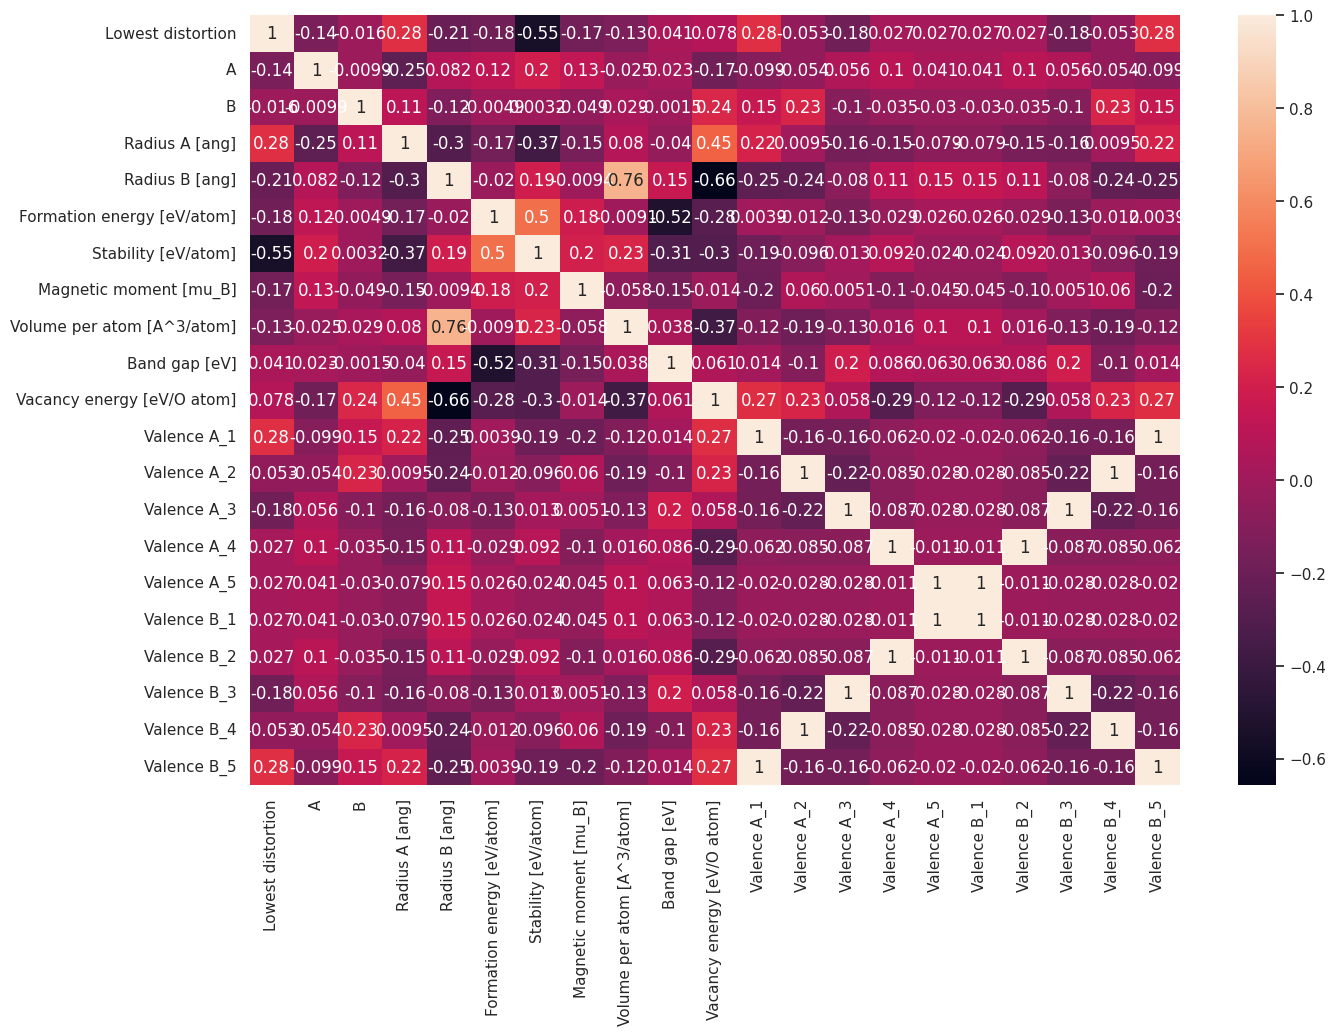

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(full_data.corr(), annot=True)
plt.show()

- Elimino features correlacionados (Eliminar Multicolinealidad)

In [32]:
#Elimino
full_data.drop(['Valence B_1', 'Valence B_2', 'Valence B_3', 'Valence B_4', 'Valence B_5'], axis=1, inplace=True)

#Valido
full_data.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Valence A_1', 'Valence A_2',
       'Valence A_3', 'Valence A_4', 'Valence A_5'],
      dtype='object')

> Análisis de correlación con Target (Puedo estimar cuales seran los pesos de los features, o eliminar aquellos no relacionados)

- Barplot de correlación

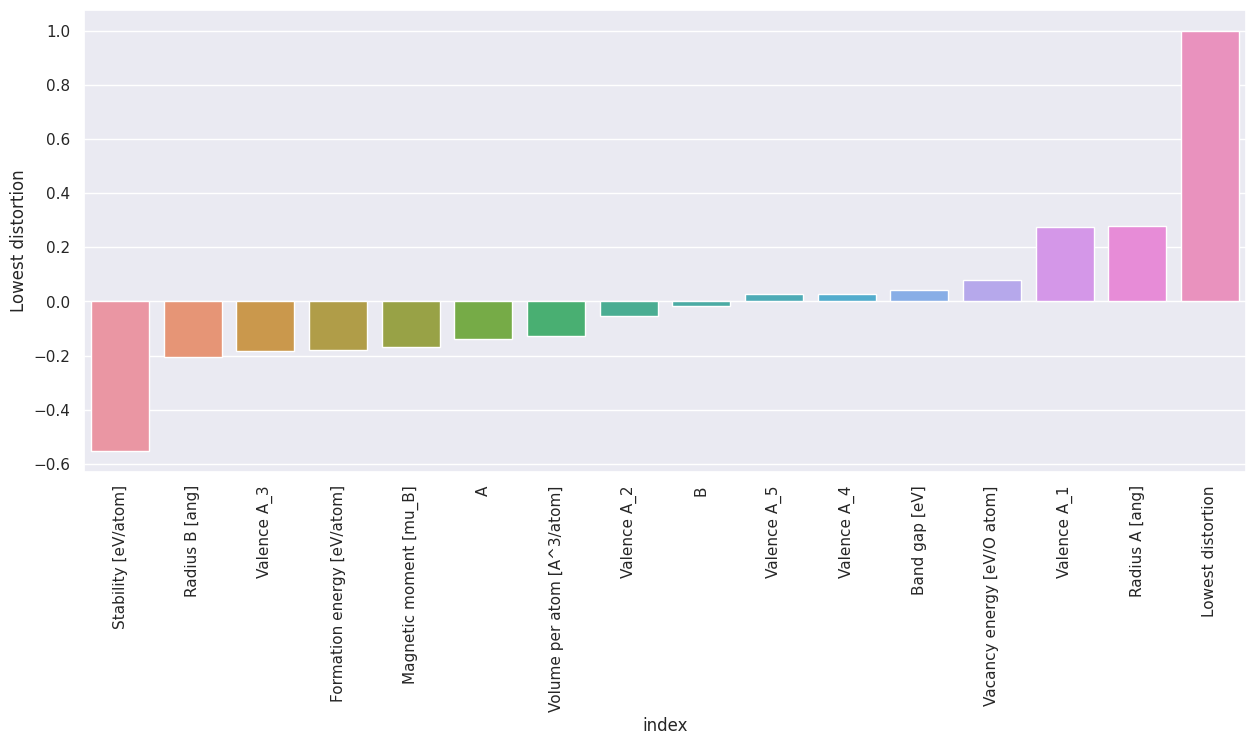

In [33]:
plt.figure(figsize=(15,6))
#plt.figure(figsize=(25,19))

corrDF = pd.DataFrame(full_data.corr()['Lowest distortion'].sort_values(ascending=True)).reset_index()
corrSplot = sns.barplot(data= corrDF,x='index', y='Lowest distortion')

#plt.bar_label(corrSplot.containers[0])
plt.xlabel='Feature'
plt.ylabel='Correlación'
plt.xticks(rotation=90)
plt.show()

- Eliminar datos (Mitigar overfitting por número de features extenso)

> Gráficos target vs variables categóricas (Gráfico de repeticiones)

- Función para graficar cada variable categórica

In [34]:
def plot_categorical(column,row):
  catSplot = sns.countplot(data=full_data, x=column, hue='Lowest distortion', ax = axs[row])

- Saco columnas categóricas a graficar

In [35]:
columns_cat = ['A', 'B', 'Valence A_1', 'Valence A_2', 'Valence A_3', 'Valence A_4', 'Valence A_5']

- Subplots por itración sobre la función

In [36]:
#fig, axs = plt.subplots(2, 1, constrained_layout=True, figsize=(8,6));

#row = 0
#for column in columns_cat:
    #plot_categorical(column, row);
    #row += 1

> Diagramas de dispersión 3D, data no categórica vs target 

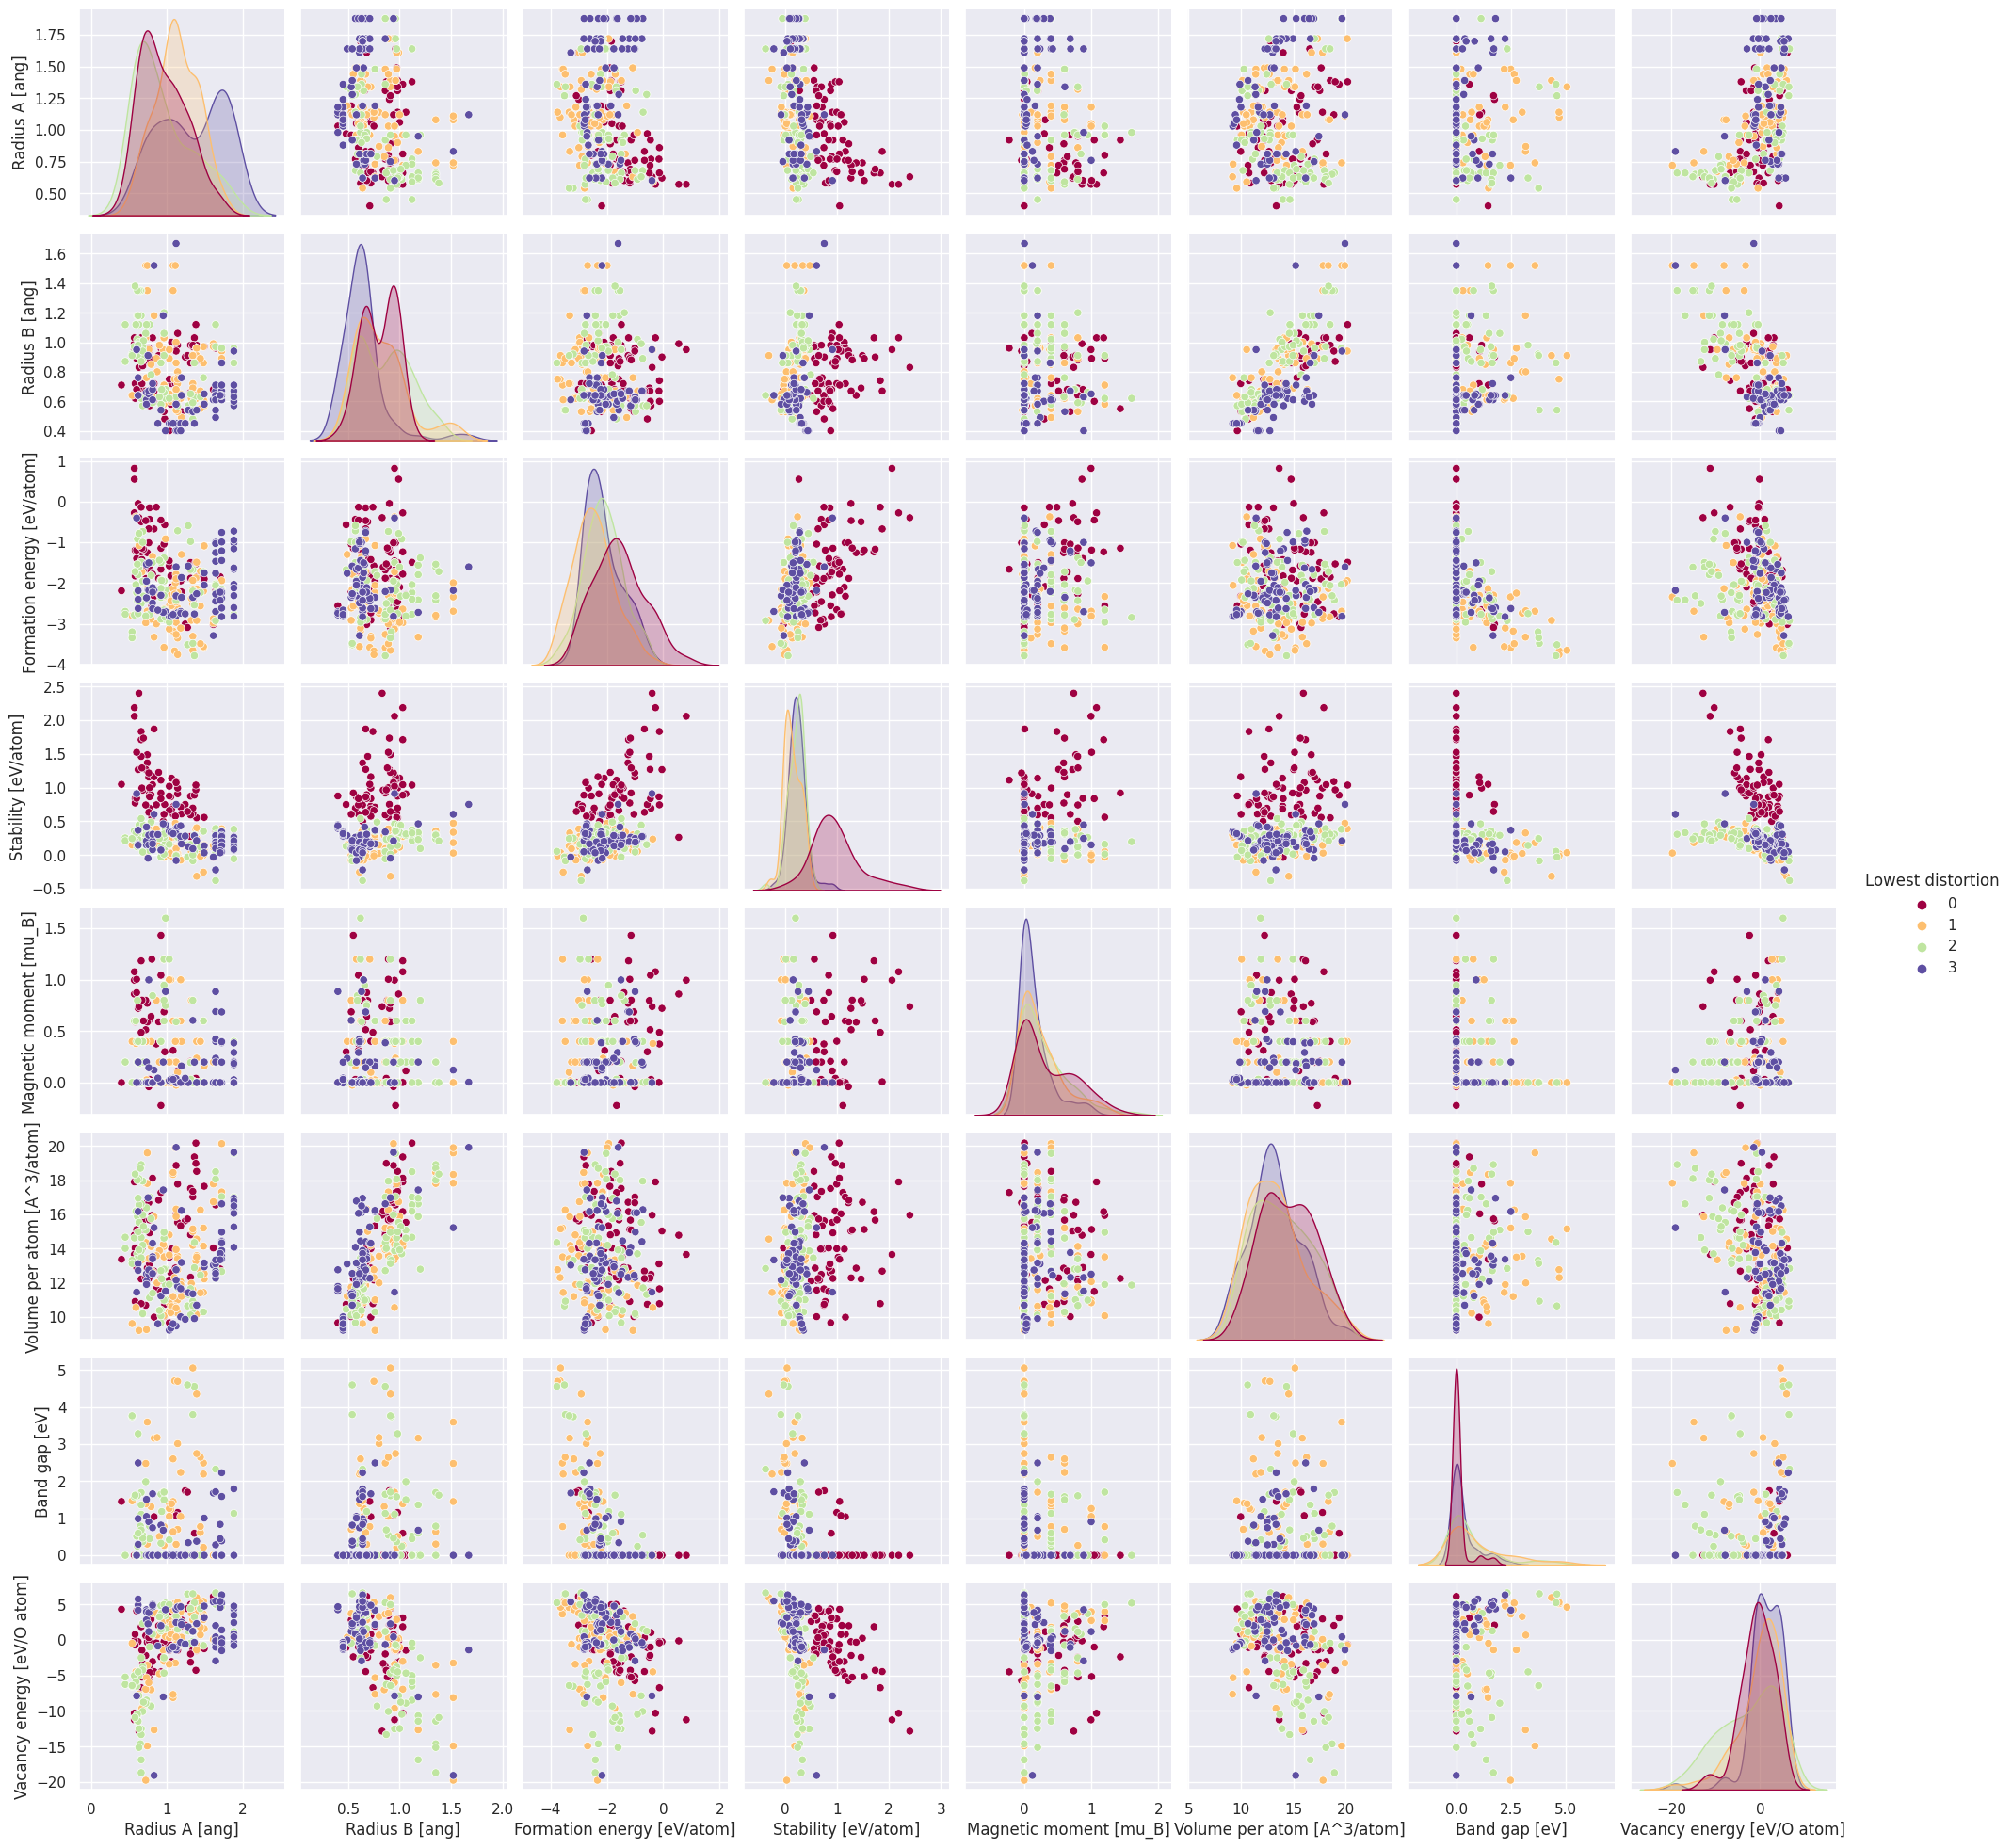

In [37]:
sns.pairplot(data=full_data.drop(columns_cat, axis=1, inplace=False), hue='Lowest distortion', palette="Spectral" )

# Exportar dataset procesado
___

> Meto al dataset el target, A, B categóricos, para poder reconocerlos

- Renombro las categorías

In [38]:
y_over.name = 'TargetCat'
A.name = 'ACat'
B.name = 'BCat'

- Los concateno

In [39]:
data_to_export = pd.concat([full_data, y_over, A, B], axis = 1)

- Valido

In [40]:
data_to_export.columns

Index(['Lowest distortion', 'A', 'B', 'Radius A [ang]', 'Radius B [ang]',
       'Formation energy [eV/atom]', 'Stability [eV/atom]',
       'Magnetic moment [mu_B]', 'Volume per atom [A^3/atom]', 'Band gap [eV]',
       'Vacancy energy [eV/O atom]', 'Valence A_1', 'Valence A_2',
       'Valence A_3', 'Valence A_4', 'Valence A_5', 'TargetCat', 'ACat',
       'BCat'],
      dtype='object')

In [41]:
data_to_export

,Lowest distortion,A,B,Radius A [ang],Radius B [ang],Formation energy [eV/atom],Stability [eV/atom],Magnetic moment [mu_B],Volume per atom [A^3/atom],Band gap [eV],Vacancy energy [eV/O atom],Valence A_1,Valence A_2,Valence A_3,Valence A_4,Valence A_5,TargetCat,ACat,BCat
0,0,54,66,1.24,0.90,-3.003,0.752,0.000,15.620,1.744,2.084,0,0,0,0,0,cubic,Sm,Y
1,0,10,34,1.31,0.98,-1.495,0.873,0.208,17.518,0.000,-3.145,0,0,0,0,0,cubic,Cd,Nd
2,0,63,4,1.05,0.58,-1.825,0.864,0.000,12.578,0.000,1.938,0,0,1,0,0,cubic,Tm,As
3,0,16,57,1.08,0.60,-2.083,0.607,0.313,12.141,0.000,1.165,0,0,0,0,0,cubic,Dy,Tc
4,0,43,17,1.14,1.06,-2.289,0.908,0.114,15.528,0.000,-1.453,0,0,0,0,0,cubic,Pm,Eu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,3,59,2,0.60,0.95,-0.402,0.911,0.000,11.448,0.000,-7.876,0,0,0,0,0,tetragonal,Tc,Ag
280,3,62,33,1.70,0.64,-2.223,0.065,0.000,13.712,0.448,4.564,1,0,0,0,0,tetragonal,Tl,Nb
281,3,62,55,1.70,0.64,-2.422,0.034,0.000,13.343,0.836,5.427,1,0,0,0,0,tetragonal,Tl,Ta
282,3,63,6,1.05,0.45,-2.817,0.335,0.032,9.338,0.000,-1.191,0,0,0,0,0,tetragonal,Tm,Be


> Exporto

In [42]:
data_to_export.to_csv("dataset_processed.csv", sep=',')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57d44cd8-e30a-4be5-b9fd-7812e0bccc78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>